<a href="https://colab.research.google.com/github/meglee67/datasci_6_regression/blob/main/hha507_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [30]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
!pip install ucimlrepo

## 1. **Simple Linear Regression**

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [7]:
df = pd.DataFrame(X)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


### Fit the simple linear regression model

In [8]:
# Fit the regression model
X = sm.add_constant(df['pH'])  # Adds a constant term to the predictor
model = sm.OLS(df['alcohol'], X)
results = model.fit()

# Print summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     96.91
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.05e-22
Time:                        05:53:49   Log-Likelihood:                -10315.
No. Observations:                6497   AIC:                         2.063e+04
Df Residuals:                    6495   BIC:                         2.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5970      0.294     25.803      0.0

## Checking assumptions


### Assessing the Linearity of the Relationship

In [9]:
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

## A significant p-value indicates that the relationship is not linear.

Rainbow Test: stat=1.1133725360883007, p-value=0.0011103359002013913


In [12]:
residuals = results.resid
fitted = results.fittedvalues

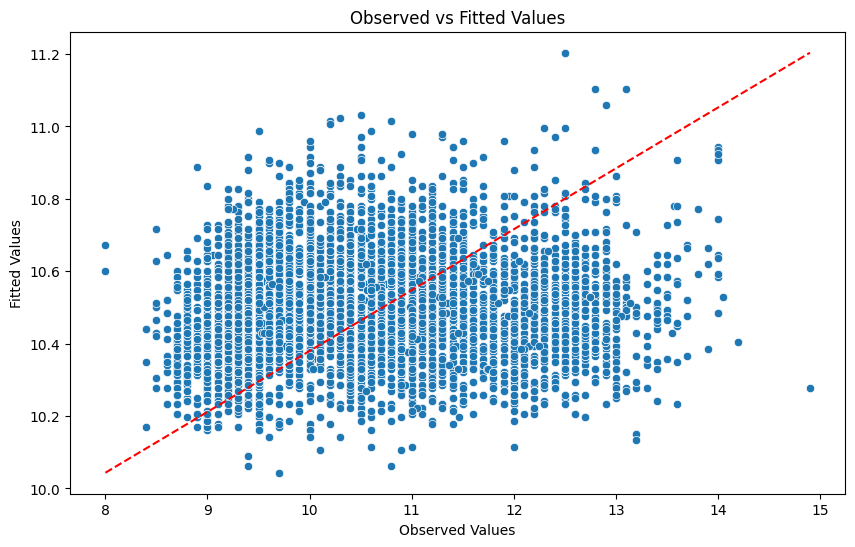

In [13]:
# Plot observed vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['alcohol'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['alcohol']), max(df['alcohol'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

### Assessing normality of the residuals

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test: W=0.9483025074005127, p-value=6.263804135531932e-43


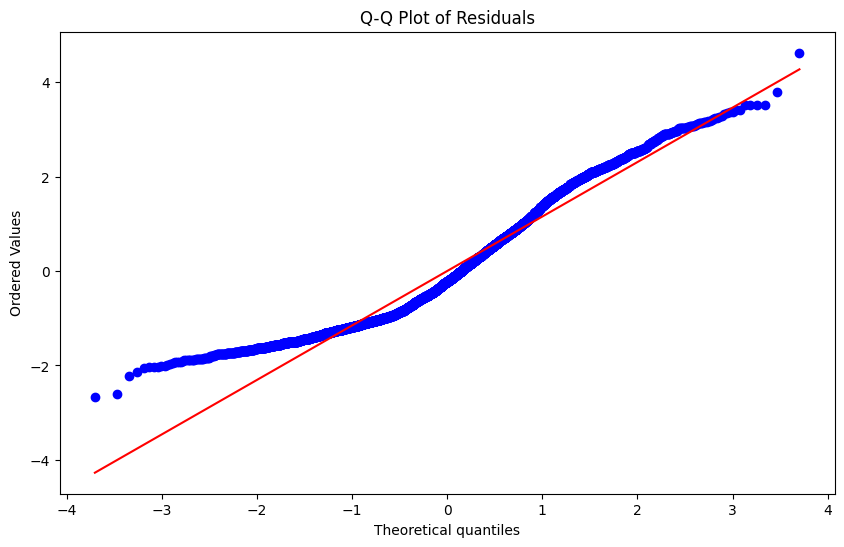

In [14]:
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### Assessing the homogeneity of variance of the residuals

In [16]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

# a significant p-value indicates heteroscedasticity, meaning that the variance of the
# residuals is not constant across different levels of the independent variable(s).

## Goldfeld-Quandt Test: The Goldfeld-Quandt test is another test used to assess homoscedasticity.
## It divides the data into two groups and compares the variance of the residuals in the two groups.

Goldfeld-Quandt Test: F-statistic=1.3598819323909832, p-value=1.1684659162330944e-18


### Plot residuals vs fitted values

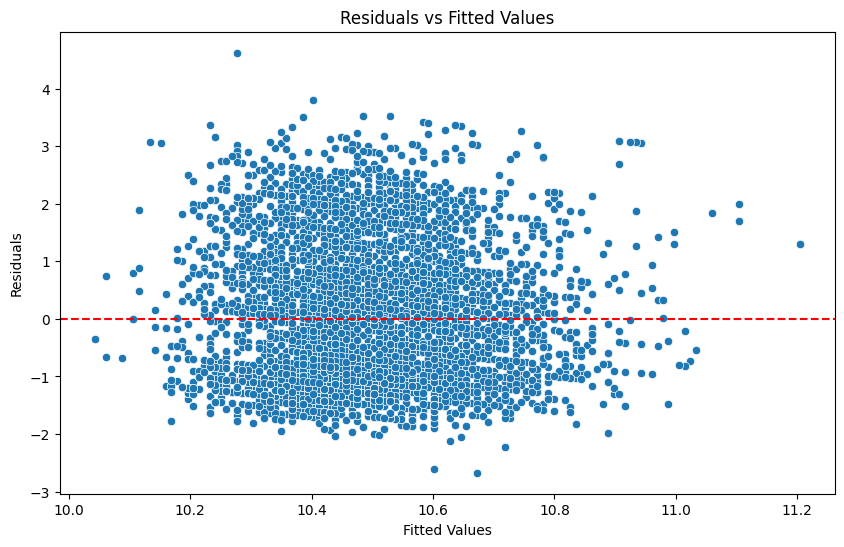

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

## **Summary**

*   X (independent variable) was pH
*   Y (dependent variable) was alcohol


**Regression Model: OLS Regression Results**
*   R-Squared: 0.015. This indicates that only about 1.5% of the variability in the alcohol variable can be explained by changes in the pH variable. This suggests that the pH alone might not be a strong predictor of alcohol content.
*   X variable (pH) had a coefficent of 0.8994. This indicates that, on average, for a one-unit increase in pH, there is an estimated increase of 0.8994 units in alcohol content.

**Assessing Linearity of the Relationship**
*   With the Rainbow test, a significant p-value indicates that the relationship is not linear.
* The low p-value of 0.0011 is not significant, indicating the relationship is not linear.

**Assessing Normality of the Residuals**
*   Using the Shapiro-Wilk test, we found that the p-value was extemely small, 6.263804135531932e-43. This means the residuals are statistically significant.

**Assessing the Homogeneity of Variance of the Residuals**
* Using the Goldfeld-Quandt test to assess homoscedasticity, which divides the data into two groups and compares the variance of the residuals in the two groups
* A significant p-value would indicate heteroscedasticity, meaning that the variance of the residuals is not constant across different levels of the independent variable(s).
* Our p-value was 1.1684659162330944e-18, meaning that the variance of the residuals is not constant, indicating heteroscedasticity.




# **2. Multiple Linear Regression**

In [24]:
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)

{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [25]:
df = pd.DataFrame(X)
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


## Fitting a multiple linear regression model

In [27]:
# Fit the regression model
X = df[['pH', 'density']]
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['alcohol']
model = sm.OLS(y, X)
results = model.fit()

# Print summary of the regression
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     3099.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        06:07:26   Log-Likelihood:                -8186.5
No. Observations:                6497   AIC:                         1.638e+04
Df Residuals:                    6494   BIC:                         1.640e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.7048      3.516     79.552      0.0

In [28]:
residuals = results.resid
fitted = results.fittedvalues

## Checking Assumptions

### Checking multicollinearity using VIF

In [31]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
  Variable            VIF
0    const  110311.568544
1       pH       1.000137
2  density       1.000137


### Assessing linearity of the relationship


In [33]:
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

## A significant p-value indicates that the relationship is not linear.

Rainbow Test: stat=1.4474733712419228, p-value=4.069851263003407e-26


### Plot of Observed vs Fitted Values

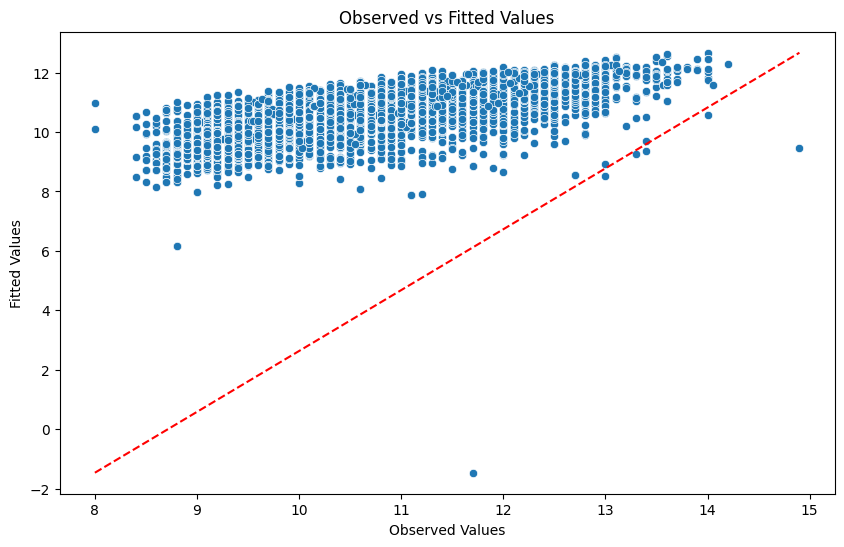

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['alcohol'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['alcohol']), max(df['alcohol'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()

### Assessing normality of the residuals


In [36]:
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.9565725326538086, p-value=3.2046014320951377e-40


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Plotting a Q-Q plot of residuals


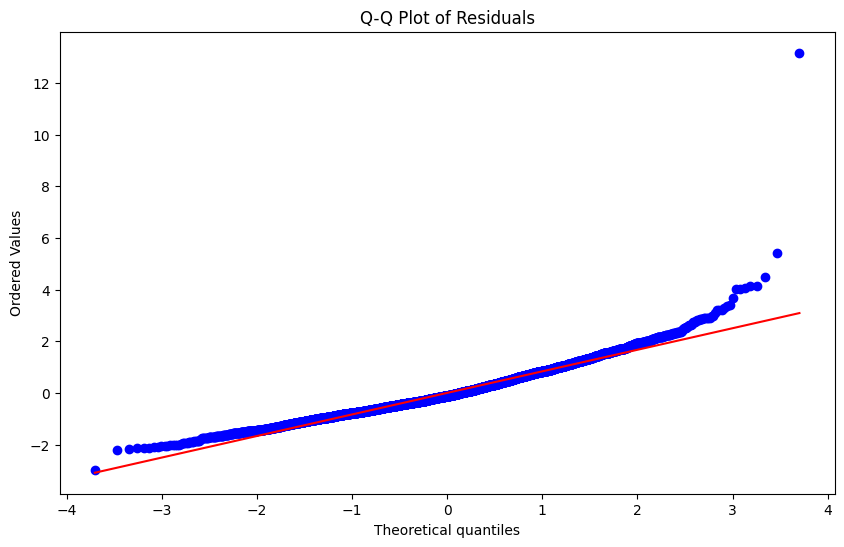

In [37]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### Assessing the homogeneity of variance of the residuals


In [38]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

# a significant p-value indicates heteroscedasticity, meaning that the variance of the
# residuals is not constant across different levels of the independent variable(s).

Goldfeld-Quandt Test: F-statistic=0.7639796194634775, p-value=0.9999999999999905


### Plotting residuals vs fitted values


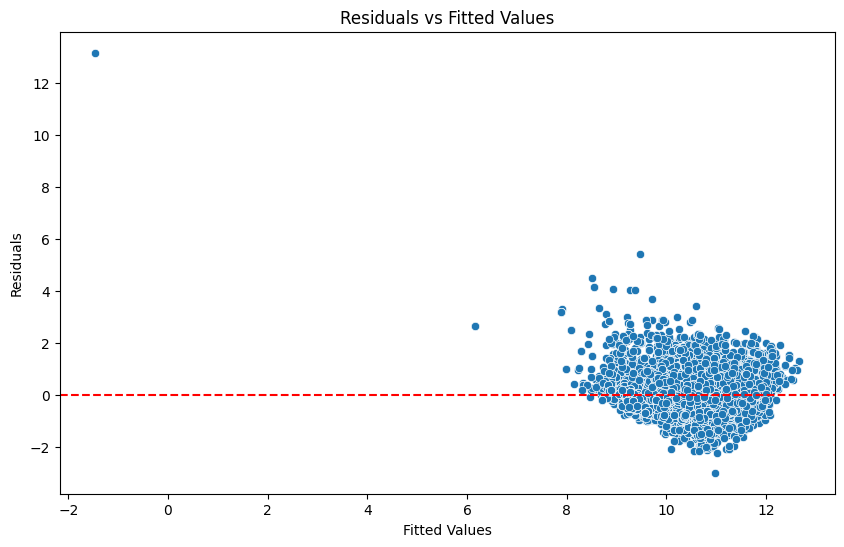

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()